<a href="https://colab.research.google.com/github/abdullah-621/Machine-Learning/blob/main/Outliers(Z_score).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Z-Score

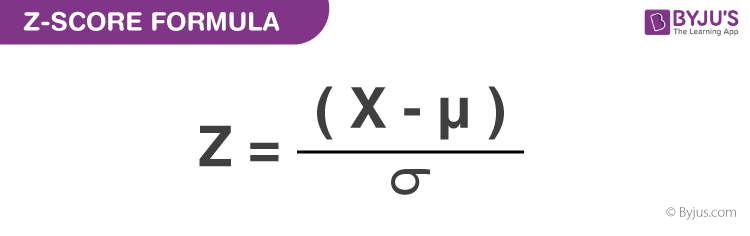

In [2]:
df = pd.read_csv("/content/placement.csv")
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


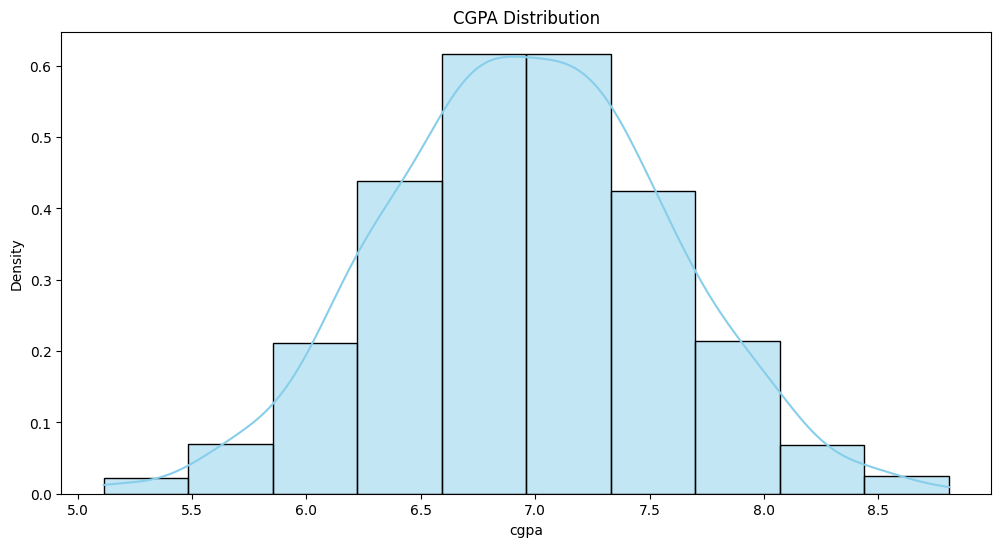

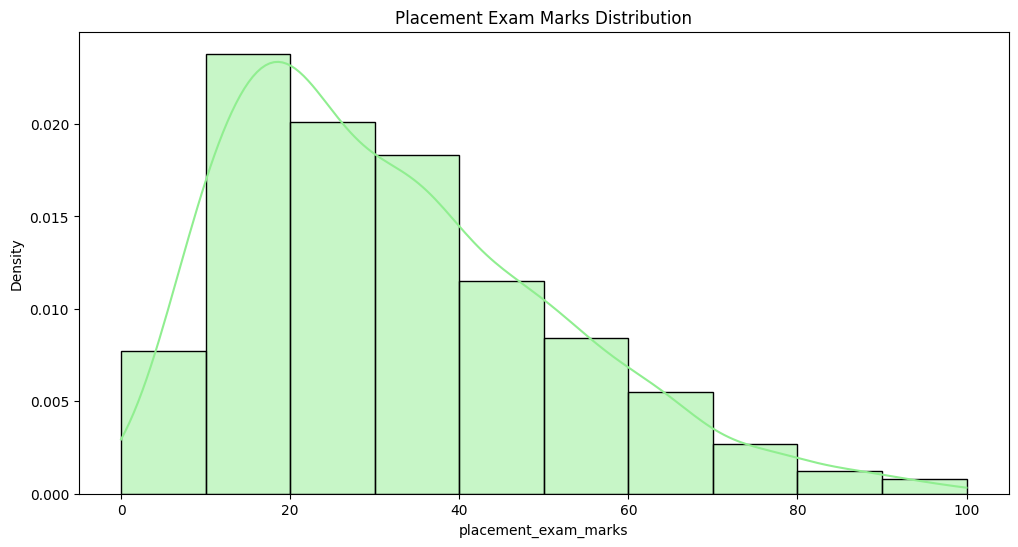

In [33]:

# Plot for 'cgpa'
plt.figure(figsize=(12,6))
sns.histplot(df['cgpa'], kde=True, stat="density", bins=10, color='skyblue')
plt.title("CGPA Distribution")
plt.show()

# Plot for 'placement_exam_marks'
plt.figure(figsize=(12,6))
sns.histplot(df['placement_exam_marks'], kde=True, stat="density", bins=10, color='lightgreen')
plt.title("Placement Exam Marks Distribution")
plt.show()


In [8]:
df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

In [10]:
print("Mean value of cgpa : ", df['cgpa'].mean())
print("Std value of cgpa : ", df['cgpa'].std())
print("min value of cgpa : ", df['cgpa'].min())
print("max value of cgpa : ", df['cgpa'].max())

Mean value of cgpa :  6.96124
Std value of cgpa :  0.6158978751323894
min value of cgpa :  4.89
max value of cgpa :  9.12


In [35]:
# Finding the boundary values

lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
print(lower_limit)
print(upper_limit)

5.123433428579941
8.799563584169265


In [36]:
# Finding the Outliers

df[(df['cgpa'] < lower_limit) | (df['cgpa'] > upper_limit)]

,cgpa,placement_exam_marks,placed
485,5.113546,44.0,1
995,8.808934,44.0,1
996,8.808934,65.0,1
997,5.113546,34.0,0
999,5.113546,10.0,1


# Trimming

In [23]:
# Trimming

new_df = df[(df['cgpa'] < upper_limit) & (df['cgpa'] > lower_limit)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


# Capping

In [19]:
df.shape

(1000, 3)

In [29]:
# capping

df['cgpa'] = np.where(

    df['cgpa'] > upper_limit, # condition

    # if true
    upper_limit,

    # if false
    np.where(
        df['cgpa'] < lower_limit,
        lower_limit,

      df['cgpa']
      )

    )

df.shape

(1000, 3)

In [30]:
df['cgpa'].describe()

,cgpa
count,1000.000000
mean,6.961499
std,0.612688
min,5.113546
25%,6.550000
50%,6.960000
75%,7.370000
max,8.808934
